In [1]:
import torch, torchvision, PIL, numpy as np
import pathlib
import PIL
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import csv
import pandas as pd
import pdb
import numpy as np
import cv2
import random
import os

In [2]:
!wget https://raw.githubusercontent.com/OMR-Research/tf-end-to-end/master/Data/vocabulary_semantic.txt

--2021-04-12 05:45:32--  https://raw.githubusercontent.com/OMR-Research/tf-end-to-end/master/Data/vocabulary_semantic.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33921 (33K) [text/plain]
Saving to: ‘vocabulary_semantic.txt’

vocabulary_semantic 100%[===================>]  33.13K  --.-KB/s    in 0.001s  

2021-04-12 05:45:33 (53.6 MB/s) - ‘vocabulary_semantic.txt’ saved [33921/33921]



In [3]:
# You can get more datasets here https://repository.cloudlab.zhaw.ch/artifactory/deepscores/archives/2017/
!wget https://grfia.dlsi.ua.es/primus/packages/primusCalvoRizoAppliedSciences2018.tgz
!wget https://grfia.dlsi.ua.es/primus/packages/CameraPrIMuS.tgz

--2021-04-12 05:45:33--  https://grfia.dlsi.ua.es/primus/packages/primusCalvoRizoAppliedSciences2018.tgz
Resolving grfia.dlsi.ua.es (grfia.dlsi.ua.es)... 193.145.231.49
Connecting to grfia.dlsi.ua.es (grfia.dlsi.ua.es)|193.145.231.49|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 273645577 (261M) [application/x-gzip]
Saving to: ‘primusCalvoRizoAppliedSciences2018.tgz’

primusCalvoRizoAppl 100%[===================>] 260.97M  9.68MB/s    in 26s     

2021-04-12 05:45:59 (9.87 MB/s) - ‘primusCalvoRizoAppliedSciences2018.tgz’ saved [273645577/273645577]

--2021-04-12 05:45:59--  https://grfia.dlsi.ua.es/primus/packages/CameraPrIMuS.tgz
Resolving grfia.dlsi.ua.es (grfia.dlsi.ua.es)... 193.145.231.49
Connecting to grfia.dlsi.ua.es (grfia.dlsi.ua.es)|193.145.231.49|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2436130024 (2.3G) [application/x-gzip]
Saving to: ‘CameraPrIMuS.tgz’

CameraPrIMuS.tgz    100%[===================>]   2.27G  10.1

In [4]:
!tar -xvf CameraPrIMuS.tgz 
!tar -xvf primusCalvoRizoAppliedSciences2018.tgz 

流式输出内容被截断，只能显示最后 5000 行内容。
./package_ab/201008631-1_1_2/201008631-1_1_2.agnostic
./package_ab/201008631-1_1_2/201008631-1_1_2.semantic
./package_ab/201008631-1_1_2/._201008631-1_1_2.mei
./package_ab/201008631-1_1_2/201008631-1_1_2.mei
./package_ab/201008631-1_1_2/._201008631-1_1_2.mid
./package_ab/201008631-1_1_2/201008631-1_1_2.mid
./package_ab/201008631-1_1_2/._201008631-1_1_2.png
./package_ab/201008631-1_1_2/201008631-1_1_2.png
./package_ab/201008631-1_1_2/._regular_pae.pae
./package_ab/201008631-1_1_2/regular_pae.pae
./package_ab/150205116-1_1_1/150205116-1_1_1.agnostic
./package_ab/150205116-1_1_1/150205116-1_1_1.semantic
./package_ab/150205116-1_1_1/._150205116-1_1_1.mei
./package_ab/150205116-1_1_1/150205116-1_1_1.mei
./package_ab/150205116-1_1_1/._150205116-1_1_1.mid
./package_ab/150205116-1_1_1/150205116-1_1_1.mid
./package_ab/150205116-1_1_1/._150205116-1_1_1.png
./package_ab/150205116-1_1_1/150205116-1_1_1.png
./package_ab/150205116-1_1_1/._regular_pae.pae
./package_ab/15020

In [5]:
!wget https://raw.githubusercontent.com/OMR-Research/tf-end-to-end/master/ctc_utils.py
!wget https://raw.githubusercontent.com/OMR-Research/tf-end-to-end/master/primus.py 

--2021-04-12 05:55:34--  https://raw.githubusercontent.com/OMR-Research/tf-end-to-end/master/ctc_utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4225 (4.1K) [text/plain]
Saving to: ‘ctc_utils.py’

ctc_utils.py        100%[===================>]   4.13K  --.-KB/s    in 0s      

2021-04-12 05:55:35 (41.6 MB/s) - ‘ctc_utils.py’ saved [4225/4225]

--2021-04-12 05:55:35--  https://raw.githubusercontent.com/OMR-Research/tf-end-to-end/master/primus.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6010 (5.9K) [text/plain]
Savin

In [6]:
!wget https://raw.githubusercontent.com/OMR-Research/tf-end-to-end/master/Data/train.txt
!wget https://raw.githubusercontent.com/OMR-Research/tf-end-to-end/master/Data/test.txt

--2021-04-12 05:55:35--  https://raw.githubusercontent.com/OMR-Research/tf-end-to-end/master/Data/train.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1265381 (1.2M) [text/plain]
Saving to: ‘train.txt’

train.txt           100%[===================>]   1.21M  --.-KB/s    in 0.03s   

2021-04-12 05:55:35 (45.7 MB/s) - ‘train.txt’ saved [1265381/1265381]

--2021-04-12 05:55:35--  https://raw.githubusercontent.com/OMR-Research/tf-end-to-end/master/Data/test.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 143357 (140K) [text/p

In [7]:
!wget https://raw.githubusercontent.com/meijieru/crnn.pytorch/master/models/crnn.py

--2021-04-12 05:55:35--  https://raw.githubusercontent.com/meijieru/crnn.pytorch/master/models/crnn.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2554 (2.5K) [text/plain]
Saving to: ‘crnn.py’

crnn.py             100%[===================>]   2.49K  --.-KB/s    in 0s      

2021-04-12 05:55:35 (57.7 MB/s) - ‘crnn.py’ saved [2554/2554]



In [8]:
from crnn import CRNN as crnn

In [9]:
class MusicClassificationObject:

  def __init__(self, dataset_dir, dataset_filenames, dictionary_path, transform=None, distortions=False):
        self.distortions = distortions
        self.dataset_dir = dataset_dir
        self.transform = transform 

        dataset_filenames = open(dataset_filenames,'r')
        dataset_list = dataset_filenames.read().splitlines()
        dataset_filenames.close()

        self.current_idx = 0

        # Dictionary
        self.symbol2index = {}
        self.index2symbol = {}
            
        dict_file = open(dictionary_path,'r') #vocabulary_semantic.txt
        dict_list = dict_file.read().splitlines()
        word_idx = 0
        for word in dict_list:
          self.symbol2index[word] = word_idx
          self.index2symbol[word_idx] = word #like hash
          word_idx += 1 

        dict_file.close()

        self.dataset, self.imgPath, self.name = self.createDataset(dataset_list)
        self.vocabulary_size = len(self.symbol2index)
  
  def createDataset(self, dataset_list):
    dataset = []
    imgPath = []
    name = []
    i = 0
    for sample in dataset_list: #train.txt
      name.append(sample)
      sample_filepath = self.dataset_dir + '/' + sample + '/' + sample
      sample_semantic = sample_filepath + '.semantic'
      sample_gt_file = open(sample_semantic, 'r')
      sample_gt_plain = sample_gt_file.readline().split() #list
      sample_gt_file.close()
      # (img file name, all the notations sequentially related to the file)
      dataset.append((sample_filepath + '.png', [self.symbol2index[lab] for lab in sample_gt_plain])) #contains the indexes of each symbol
      imgPath.append(sample_filepath + '.png')
    return dataset, imgPath, name

  def __len__(self):
    return len(self.dataset)
  
  def __getitem__(self, i):
      if torch.is_tensor(i):
          i = i.item()
      imgfn, label = self.dataset[i]
      img = PIL.Image.open(imgfn)
      if self.transform:
          img = self.transform(img)
      return (img, label)

  def getImg(self, i):
      imgfn, label = self.dataset[i]
      img = PIL.Image.open(imgfn)
      return (img, label)
  
  def getPath(self, i):
      return self.imgPath[i]

  def getName(self, i):
      return self.name[i]


In [10]:
os.chdir('/content')
xform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
music_dataset = MusicClassificationObject('Corpus', 'train.txt', 'vocabulary_semantic.txt', xform)

In [11]:
music_dataset.getPath(156)

'Corpus/000101455-1_1_1/000101455-1_1_1.png'

In [12]:
music_dataset.getImg(156)

(<PIL.PngImagePlugin.PngImageFile image mode=P size=2002x157 at 0x7FE736DE1D10>,
 [10,
  228,
  1780,
  1059,
  0,
  1064,
  1727,
  1730,
  453,
  0,
  447,
  1727,
  1730,
  1467,
  0,
  1459,
  1730,
  460,
  1671,
  1477,
  1232,
  0,
  1036,
  1019,
  1044,
  1467,
  1452,
  1477,
  0])

(-0.5, 2001.5, 156.5, -0.5)

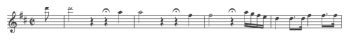

In [13]:
plt.imshow(music_dataset.getImg(156)[0])
plt.axis('off')

In [14]:
music_dataset[156]
#len(music_dataset)

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]),
 [10,
  228,
  1780,
  1059,
  0,
  1064,
  1727,
  1730,
  453,
  0,
  447,
  1727,
  1730,
  1467,
  0,
  1459,
  1730,
  460,
  1671,
  1477,
  1232,
  0,
  1036,
  1019,
  1044,
  1467,
  1452,
  1477,
  0])

In [15]:
len(music_dataset)

78755

In [16]:
def show_img(sample, title=None):
    img, _ = sample
    if torch.is_tensor(img):
        img = img.cpu().permute(1,2,0)
    #img = cv2.cvtColor(img[:,:,0], cv2.COLOR_BGR2RGB)
    #image = np.array(img)
    #pixels = np.array(img)
    plt.imshow(img[:,:,0], cmap='gist_gray') #img[:,:,0]
    if title:
        plt.title(title) # add color='w' arg if using a dark background
    plt.axis('off')

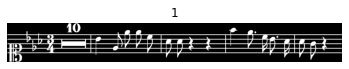

In [17]:
show_img(music_dataset[0], title=1)

Notes Splitting (High-lights Lines)

In [18]:
def get_lines(path, title=None):

  img = cv2.imread(path)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  blur_gray = cv2.GaussianBlur(gray,(5, 5),0)

  h, w, c = img.shape

  edge = cv2.Canny(blur_gray, 150, 300)

  theta = np.pi / 180
  line_image = np.copy(img)

  lines = cv2.HoughLinesP(edge, 1, theta, 1, np.array([]),
                    150, 30)
  rank = []
  rank2 = []
  HashRank = {}
  
  for line in lines:
    for x1,y1,x2,y2 in line:
        rank.append((x2-x1, x1, x2, y1, y2))
        #rank2.append(x2-x1 + '+' + x1 + '+' + x2)
        sentence = str(x2-x1) + ' ' + str(x1) + ' ' + str(x2) + ' ' + str(y1) + ' ' + str(y2) 
        HashRank[sentence] = (y1, y2)

  lines2 = []
  j = 1
  rank = sorted(rank,key=lambda l:l[0])
  check = 1

  a,b,c,d,e = rank[-1]
  sentence = str(a) + ' ' + str(b) + ' ' + str(c) + ' ' + str(d) + ' ' + str(e)
  lines2.append(HashRank[sentence])

  HashRank.pop(sentence)
  rank.pop()

  while j < 5 and len(rank) != 0:
    a,b,c,d,e = rank[-1]
    sentence = str(a) + ' ' + str(b) + ' ' + str(c) + ' ' + str(d) + ' ' + str(e)
    y11, y22 = HashRank[sentence]
    for y1r, y2r in lines2:
      if (abs(y11 - y1r) < 10 or abs(y22 - y2r) < 10):
        check = 0
    if check == 1:
      lines2.append(HashRank[sentence])
      j = j + 1
    
    HashRank.pop(sentence)
    rank.pop()
    check = 1

  for line in lines2:
      cv2.line(line_image,(0, line[0]),(w - 1, line[0]),(0,255,0), 2) #bug on 000051761-1_1_1Line consider dis between length..?

  total= 0
  y = []
  for line in lines2:
    y.append(line[0])
  
  y.sort()

  for i in range(len(y) - 1):
    total += y[i+1] - y[i]
  
  total = int(total / 4)

  if ((y[0] - total) < h):
    cv2.line(line_image,(0, y[0] - total),(w - 1, y[0] - total),(255,0,0), 2) #red = line 6
  if ((y[0] - 2 * total) < h):
    cv2.line(line_image,(0, y[0] - 2*total),(w - 1, y[0] - 2*total),(0,0,255), 2) #blue = line 7

  #plt.imshow(line_image)

  return line_image

In [19]:
def get_Coord(path, title=None): #still need to change a bit to increase the accuracy

  img = cv2.imread(path)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  blur_gray = cv2.GaussianBlur(gray,(5, 5),0)

  h, w, c = img.shape

  edge = cv2.Canny(blur_gray, 150, 300)

  theta = np.pi / 180
  line_image = np.copy(img)

  lines = cv2.HoughLinesP(edge, 1, theta, 1, np.array([]),
                    150, 30)
  rank = []
  rank2 = []
  HashRank = {}
  
  for line in lines:
    for x1,y1,x2,y2 in line:
        rank.append((x2-x1, x1, x2, y1, y2))
        #rank2.append(x2-x1 + '+' + x1 + '+' + x2)
        sentence = str(x2-x1) + ' ' + str(x1) + ' ' + str(x2) + ' ' + str(y1) + ' ' + str(y2) 
        HashRank[sentence] = (y1, y2)

  lines2 = []
  j = 1
  rank = sorted(rank,key=lambda l:l[0])
  check = 1

  a,b,c,d,e = rank[-1]
  sentence = str(a) + ' ' + str(b) + ' ' + str(c) + ' ' + str(d) + ' ' + str(e)
  lines2.append(HashRank[sentence])

  HashRank.pop(sentence)
  rank.pop()

  while j < 5 and len(rank) != 0:
    a,b,c,d,e = rank[-1]
    sentence = str(a) + ' ' + str(b) + ' ' + str(c) + ' ' + str(d) + ' ' + str(e)
    y11, y22 = HashRank[sentence]
    for y1r, y2r in lines2:
      if (abs(y11 - y1r) < 10 or abs(y22 - y2r) < 10):
        check = 0
    if check == 1:
      lines2.append(HashRank[sentence])
      j = j + 1
    
    HashRank.pop(sentence)
    rank.pop()
    check = 1

  #for line in lines2:
      #cv2.line(line_image,(0, line[0]),(w - 1, line[0]),(0,255,0), 2)

  total= 0
  y = []
  for line in lines2:
    y.append(line[0])
  
  y.sort()

  for i in range(len(y) - 1):
    total += y[i+1] - y[i]
  
  total = int(total / 4)

  if ((y[0] - total) < h):
    y.append(y[0] - total)
  if ((y[0] - 2 * total) < h):
    y.append(y[0] - 2 * total)

  y.sort()

  return y

In [20]:
sa = get_lines(music_dataset.getPath(10))

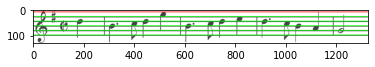

In [21]:
plt.imshow(sa)

-----------------------------------------------------------------

In [22]:
os.mkdir('/content/CorpusLines') 

In [23]:
os.mkdir('/content/CorpusSplitted')

In [24]:
from PIL import Image

In [25]:
def remove_white(imagePath, wantnp = False): #works only for printed music scores
  theIm = Image.open(imagePath, 'r')
  thePix = theIm.load()
  pim = np.array(theIm)
  hh, ww = pim.shape
  checkk = 0
  ref = []
  for j in range(hh):
    thePix[1,j] = 0
    thePix[0,j] = 0
    ref.append(thePix[3,j])

  #get "density" here
  upper = 0
  lower = 0
  counter = 0
  for i in range(hh):
    if(ref[i] == 1):
      upper = i
      break
  
  for i in range(hh):
    if(ref[hh - 1 - i] == 1):
      lower = hh - 1 - i
      break

  for i in range(upper, lower + 1):
    if(ref[i] == 1):
      counter += 1
  
  height = lower - upper + 1 #important.....
  density = counter / height
  #density ends here

  #remove white space purely
  modi = []
  count = 0
  for k in range(ww-1):
    for j in range(hh):
      if (ref[j] != thePix[k,j]):
        checkk = 1
        break
    
    if(checkk == 0):
      modi.append(1)
      count = count + 1
      for z in range(hh):
        thePix[k, z] = 0
    else:
      modi.append(0)
    checkk = 0
  
  checkk = 0

  #last col
  for j in range(hh):
    if (thePix[k+1,j] != 0):
        checkk += 1
    
  if(checkk <= 10):
      modi.append(1)
      count = count + 1
      for z in range(hh):
        thePix[ww - 1, z] = 0
  else:
      modi.append(0)
  checkk = 0

  itt = modi[6:-6]
  indexx = 0
  for i in range(len(itt)):
    should = 0

    #print(i)
    #print(len(itt))
    if(modi[i + 6] == 0 and modi[i + 6 + 1] == 1): #i + 1 --> j - 1
      for j in range(5):
        if (modi[i + 1 + 6 + j] == 0): #may have bug here...
          index = i + j
          should = 1
    if(should == 1):
      for q in range(i+1 + 6,index + 1 + 6):
        for z in range(hh):
          thePix[q, z] = ref[z]
    should = 0

  #need to be changed
  if wantnp:
    return np.array(theIm) #as a whole

  else:
    imgArray = []
    index = 0
    yes = 0
    for i in range(3, ww):
      if(modi[i] == 0):
        yes = 1
        index += 1
      else:
        if(yes == 1):
          yes = 0
          copyImg = theIm.copy()
          cropped = copyImg.crop((i - index - 1, 0, i, hh))
          imgArray.append(cropped)
          index = 0
    newerArray = []
    index2 = 0
    for i in range(len(imgArray)):
        ColCounter, place, numPix, hhh, www = getCol(imgArray[i], upper, lower)
        #print(ColCounter)
        if (ColCounter >= 2):
          length = place[-1] - place[0] + 1
          totalSpace = length * height
          if ((numPix >= 0.25 * 0.8 * totalSpace) and (numPix <= 0.65 * totalSpace) and (lower - upper + 1 <= www)): #multi..
            index2 = 0
            NumCut = ColCounter - 1
            cutSpace = (int)(length / NumCut)
            for z in range (NumCut):
              copyImg = imgArray[i].copy()
              cropped = copyImg.crop((index2, 0, index2 + cutSpace, hhh))
              newerArray.append(cropped)
              index2 = index2 + cutSpace
            copyImg = imgArray[i].copy()
            cropped = copyImg.crop((index2, 0, www, hhh))
            newerArray.append(cropped)
        else:
          newerArray.append(imgArray[i])

    return newerArray

In [26]:
def getCol(img, upper, lower):
  theIm = img.copy()
  height = lower - upper + 1
  thePix = theIm.load()
  pim = np.array(theIm)
  hh, ww = pim.shape
  isCol = []
  theSameCol = 0
  currentLen = 0
  maxLen = 0
  test = []
  for i in range(ww):
    currentLen = 0
    maxLen = 0
    test = []
    for j in range(0, hh): #j in range(upper, lower + 1): 
      if (thePix[i,j] == 1):
        currentLen += 1
        #test.append(currentLen)
        #print(currentLen)
      else:
        #test.append(currentLen)
        if (maxLen < currentLen):
          maxLen = currentLen
        currentLen = 0
    #print(maxLen)
    if (maxLen < currentLen):
        maxLen = currentLen
    currentLen = 0
    if (maxLen >= (int)(0.5 * height)): #(int)(0.5 * height)) #change? 
      isCol.append(1)
    else:
      isCol.append(0)
    #print(test)
  
  ColCounter = 0
  place = []
  incase = 0
  for i in range(len(isCol)):
    incase = 0
    if (isCol[i] == 1 and theSameCol == 0):
      theSameCol = 1
      incase += 1
      ColCounter += 1
    elif (isCol[i] == 0 and theSameCol == 1):
      theSameCol = 0
      if (incase < 6): #change?
        place.append(i)
      incase = 0

  if (theSameCol == 1):
    place.append(i)
  
  numPix = 0
  if (len(place) >= 2):
    for i in range(place[0], place[-1]):
      for j in range(upper, lower + 1):
        if (thePix[i,j] == 1):
          numPix += 1

  return ColCounter, place, numPix, hh, ww

In [27]:
def connectImg(imgArray, filter, show = False):
  theIm = imgArray[0].copy()
  pim = np.array(theIm)
  hh, ww = pim.shape

  white = np.zeros([hh,10,1],dtype=np.uint8) #how many channels..
  white.fill(0)

  npp = np.array(imgArray[0])
  working = cv2.hconcat([npp, white])

  for i in range(1, len(imgArray)):
    npp = np.array(imgArray[i])
    onGoing = cv2.hconcat([npp, white])
    working = cv2.hconcat([working, onGoing])  

  if show:
    plt.imshow(working, filter)
  return working



---



In [28]:
class MusicClassificationLineSplitted:
  def __init__(self, dataset_dir, dataset_filenames, dictionary_path, music_dataset, distortions=False):
        self.distortions = distortions
        self.dataset_dir = dataset_dir

        dataset_filenames = open(dataset_filenames,'r')
        dataset_list = dataset_filenames.read().splitlines()
        dataset_filenames.close()

        self.current_idx = 0

        # Dictionary
        self.symbol2index = {}
        self.index2symbol = {}
            
        dict_file = open(dictionary_path,'r') #vocabulary_semantic.txt
        dict_list = dict_file.read().splitlines()
        word_idx = 0
        for word in dict_list:
          self.symbol2index[word] = word_idx
          self.index2symbol[word_idx] = word #like hash
          word_idx += 1 

        dict_file.close()

        self.dataset, self.imgPath = self.createDataset(dataset_list)
        self.vocabulary_size = len(self.symbol2index)
  
  def createDataset(self, dataset_list):
    dataset = []
    imgPath = []
    i = 0
    for sample in dataset_list: #train.txt
      sample_getPath = self.dataset_dir + 'Lines' + '/' + sample + 'Line'
      sample_filepath = self.dataset_dir + '/' + sample + '/' + sample
      sample_semantic = sample_filepath + '.semantic'
      sample_gt_file = open(sample_semantic, 'r')
      sample_gt_plain = sample_gt_file.readline().split() #list
      sample_gt_file.close()
      # (img file name, all the notations sequentially related to the file)
      dataset.append((get_Coord(sample_filepath + '.png'), [self.symbol2index[lab] for lab in sample_gt_plain])) #contains the indexes of each symbol
      imgPath.append(sample_getPath + '.png')
    return dataset, imgPath

  def __len__(self):
    return len(self.dataset)
  
  def __getitem__(self, i):
      os.chdir('/content')
      imgS = remove_white(music_dataset.getPath(i))
      imgSS = connectImg(imgS, 'gist_gray') 
      os.chdir('/content/CorpusSplitted')
      imgSS = cv2.normalize(imgSS, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
      IMGNAME = music_dataset.getName(i) + 'Splitted' + '.png'
      cv2.imwrite(IMGNAME, imgSS)
      os.chdir('/content')

      return imgSS
  
  def getNameSplit(self, i):
      IMGNAME = music_dataset.getName(i) + 'Splitted' + '.png'

      return IMGNAME

  def getImgLined(self, i):
      imgfn = self.imgPath[i]
      os.chdir('/content')
      if os.path.exists(imgfn):
        img = PIL.Image.open(imgfn)
        plt.imshow(img)
        os.chdir('/content')
        return img
      else:
        print("No Img File")
        os.chdir('/content')
        return 0 #work?
  
  def getPath(self, i):
      return self.imgPath[i]

  def getYaxi(self, i):
      coor = self.dataset[i] #7 - 1 line
      return coor

In [29]:
aa = get_lines(music_dataset.getPath(0))

In [30]:
for i in range(len(music_dataset)): #get Images #create dataset..
  os.chdir('/content')
  imgg = get_lines(music_dataset.getPath(i))
  os.chdir('/content/CorpusLines')
  cv2.imwrite(music_dataset.getName(i) + 'Line' + '.png', imgg)

In [31]:
os.chdir('/content')

In [33]:
dataset_Coor = MusicClassificationLineSplitted('Corpus', 'train.txt', 'vocabulary_semantic.txt', music_dataset)

In [34]:
dataset_Coor[1000][0] #7 - 1 line

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [35]:
dataset_Coor.getPath(1)

'CorpusLines/000051652-1_1_1Line.png'

In [36]:
dataset_Coor.getPath(1)

'CorpusLines/000051652-1_1_1Line.png'

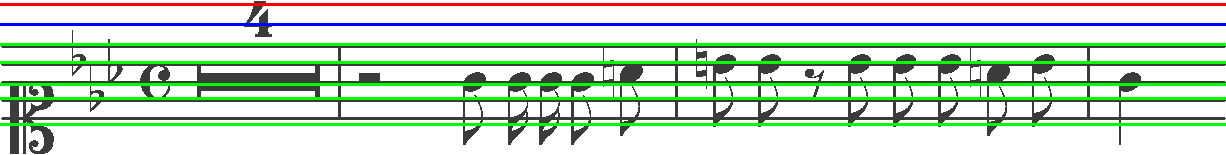

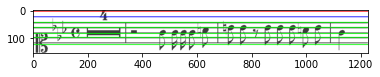

In [38]:
dataset_Coor.getImgLined(1)

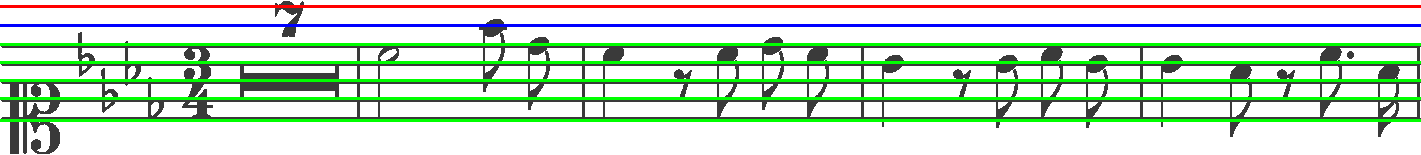

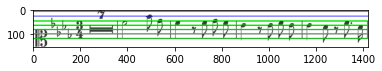

In [40]:
dataset_Coor.getImgLined(2)

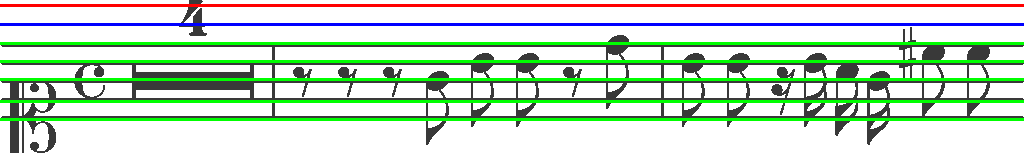

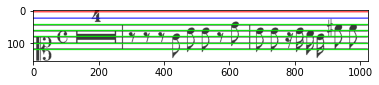

In [41]:
dataset_Coor.getImgLined(3)

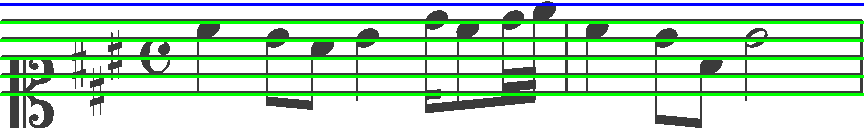

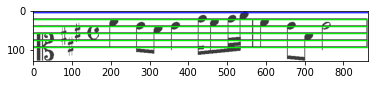

In [42]:
dataset_Coor.getImgLined(4)

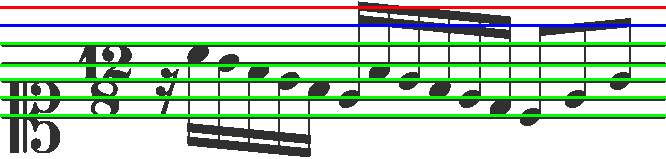

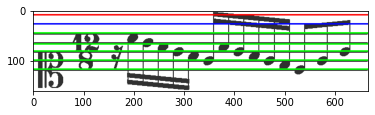

In [43]:
dataset_Coor.getImgLined(5)

In [44]:
acsa = remove_white(music_dataset.getPath(152))

In [45]:
ac = remove_white('/content/Corpus/000100161-1_2_1/000100161-1_2_1.png')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


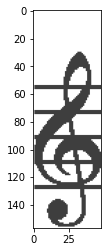

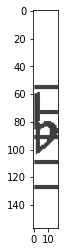

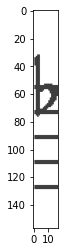

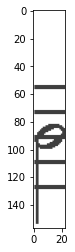

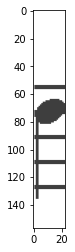

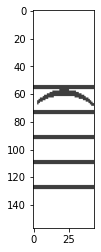

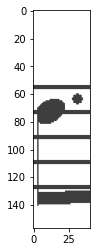

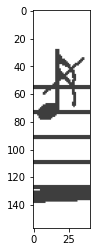

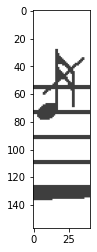

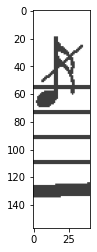

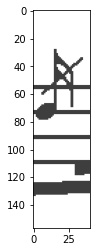

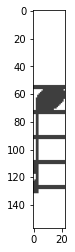

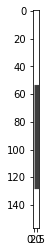

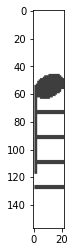

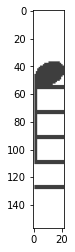

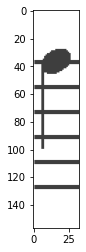

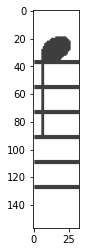

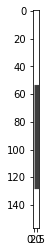

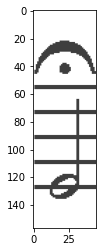

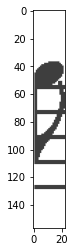

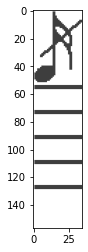

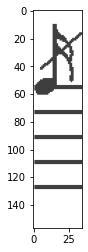

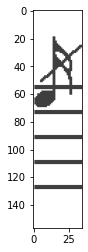

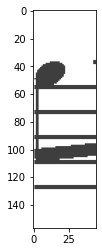

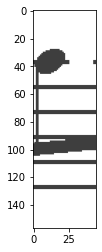

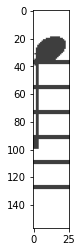

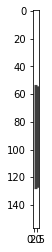

In [46]:
for i in range(len(ac)): # 9 A tail, 3 A Line, 3 Bar, 2 note line vertical
  fig = plt.figure()
  plt.imshow(ac[i])
  fig.show()

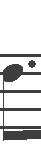

In [47]:
ac[6]

In [48]:
hello = connectImg(ac, 'gist_gray')

In [49]:
hello2 = connectImg(ac, 'gist_gray')

In [60]:
adf = remove_white('/content/Corpus/000100161-1_2_1/000100161-1_2_1.png')
adf = connectImg(adf, 'gist_gray') 
adf = cv2.normalize(adf, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

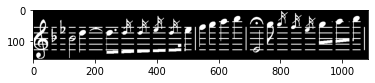

In [62]:
plt.imshow(adf, 'gist_gray')

In [50]:
abc = remove_white('/content/Corpus/000100161-1_2_1/000100161-1_2_1.png', wantnp=True) #basically the very beginning thing

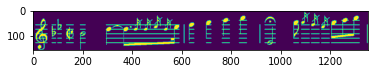

In [51]:
plt.imshow(abc)

In [52]:
acd = remove_white(music_dataset.getPath(560))
hello2 = connectImg(acd, 'gist_gray')
hello2 = cv2.normalize(hello2, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

In [53]:
cv2.imwrite('\abccc.png', hello2)

True

In [54]:
dataset_Coor[5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

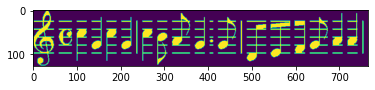

In [57]:
plt.imshow(dataset_Coor[55]) #get image

In [ ]:
plt.imshow(dataset_Coor[55]) #get image

Splitting Get Special Notes (above those being spitted) //(Being done above)
1. get lines with getCorr
2. assign a region eg +- 5 pixels, outer place should be white
3. get the x of columns
4. detect the Black component in other x 

TO DO:
  
*   dots on under/above the long notes
*   left and right parts of the special notes
*   Numbers
*   Notes above and below (other than the "long notes")

Under: Still working

  
  

In [ ]:
class MusicClassificationSplit: #do we need this?

  def __init__(self, dataset_dir, dataset_filenames, dictionary_path, distortions=False):
        self.distortions = distortions
        self.dataset_dir = dataset_dir

        dataset_filenames = open(dataset_filenames,'r')
        dataset_list = dataset_filenames.read().splitlines()
        dataset_filenames.close()

        self.current_idx = 0

        # Dictionary
        self.symbol2index = {}
        self.index2symbol = {}
            
        dict_file = open(dictionary_path,'r') #vocabulary_semantic.txt
        dict_list = dict_file.read().splitlines()
        word_idx = 0
        for word in dict_list:
          self.symbol2index[word] = word_idx
          self.index2symbol[word_idx] = word #like hash
          word_idx += 1 

        dict_file.close()

        self.dataset, self.imgPath = self.createDataset(dataset_list)
        self.vocabulary_size = len(self.symbol2index)
  
  def createDataset(self, dataset_list):
    dataset = []
    imgPath = []
    i = 0
    for sample in dataset_list: #train.txt
      sample_getPath = self.dataset_dir + 'Splitted' + '/' + sample + 'Splitted'
      sample_filepath = self.dataset_dir + '/' + sample + '/' + sample
      sample_semantic = sample_filepath + '.semantic'
      sample_gt_file = open(sample_semantic, 'r')
      sample_gt_plain = sample_gt_file.readline().split() #list
      sample_gt_file.close()
      # (img file name, all the notations sequentially related to the file)
      dataset.append((get_Coord(sample_filepath + '.png'), [self.symbol2index[lab] for lab in sample_gt_plain])) #contains the indexes of each symbol
      imgPath.append(sample_getPath + '.png')
    return dataset, imgPath

  def __len__(self):
    return len(self.dataset)
  
  def __getitem__(self, i):
      imgfn = self.imgPath[i]
      os.chdir('/content')
      if os.path.exists(imgfn):
        img = PIL.Image.open(imgfn)
        plt.imshow(img)
        os.chdir('/content')
        return img
      else:
        print("No Img File")
        os.chdir('/content')
        return 0

  def getImg(self, i):
      imgfn = self.imgPath[i]
      os.chdir('/content')
      if os.path.exists(imgfn):
        img = PIL.Image.open(imgfn)
        plt.imshow(img)
        os.chdir('/content')
        return img
      else:
        print("No Img File")
        os.chdir('/content')
        return 0
  
  def getPath(self, i):
      return self.imgPath[i]

In [ ]:
os.chdir('/content')
imgS = remove_white(music_dataset.getPath(10))
imgSS = connectImg(imgS, 'gist_gray')
plt.imshow(imgSS)

In [ ]:
for i in range(len(music_dataset)): #get Images #create dataset.. #an algorithm --> get data use this modify...
  os.chdir('/content')
  imgS = remove_white(music_dataset.getPath(i))
  imgSS = connectImg(imgS, 'gist_gray') 
  os.chdir('/content/CorpusSplitted')
  cv2.imwrite(music_dataset.getName(i) + 'Splitted' + '.png', imgSS)

In [ ]:
dataset_Splitted = MusicClassificationSplit('Corpus', 'train.txt', 'vocabulary_semantic.txt')

In [ ]:
for i in range(len(aca)): # 9 A tail, 3 A Line, 3 Bar, 2 note line vertical
  fig = plt.figure()
  plt.imshow(aca[i])
  fig.show()